In [1]:
import gzip
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm

In [2]:
Muon_Geo = [-5732.0000, -3170.0000]

In [3]:
inputs_file = '../subsample.pkl'
with gzip.open(inputs_file, 'rb') as f:
    inputs = pickle.load(f)
px_input,py_input,pz_input,x_input,y_input,z_input,charge_input = inputs.T

outputs_file = 'outputs_geant4.pkl'
with gzip.open(outputs_file, 'rb') as f:
    outputs = pickle.load(f)
px,py,pz,x,y,z,charge = outputs.T

outputs_fs = 'outputs_fairship.pkl'
with gzip.open(outputs_fs, 'rb') as f:
    outputs_fs = pickle.load(f)
px_fs_start,py_fs_start,pz_fs_start,x_start,y_start,z_start,pdg,x_fs,y_fs,z_fs,px_fs,py_fs,pz_fs,track_id = outputs_fs.T

In [4]:
pt_input = np.sqrt(px_input**2+py_input**2)
P_input = np.sqrt(pt_input**2+pz_input**2)

pt = np.sqrt(px**2+py**2)
P = np.sqrt(pt**2+pz**2)

pt_fs = np.sqrt(px_fs**2+py_fs**2)
p_fs = np.sqrt(pt_fs**2+pz_fs**2)
pt_fs_start = np.sqrt(px_fs_start**2+py_fs_start**2)
p_fs_start = np.sqrt(pt_fs_start**2+pz_fs_start**2)

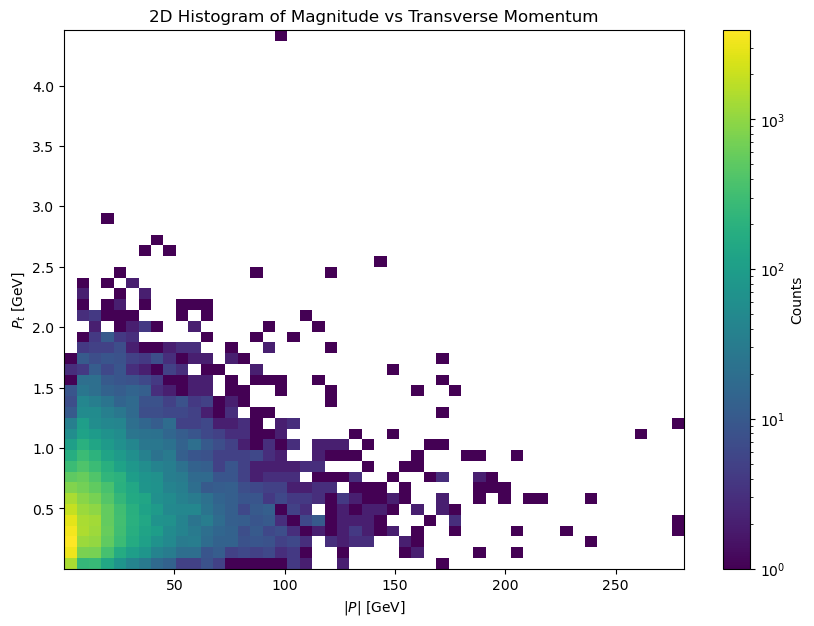

In [5]:
plt.figure(figsize=(10, 7))
plt.hist2d(P_input, pt_input, bins=50, cmap='viridis', norm=LogNorm())

# Add color bar
plt.colorbar(label='Counts')

# Add labels and title
plt.xlabel('$|P|$ [GeV]')
plt.ylabel('$P_t$ [GeV]')
plt.title('2D Histogram of Magnitude vs Transverse Momentum')

# Show plot
plt.show()

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.2638e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

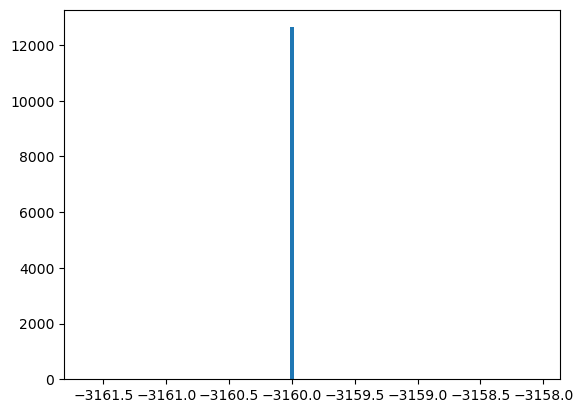

In [6]:
plt.hist(z_fs,bins= 100)

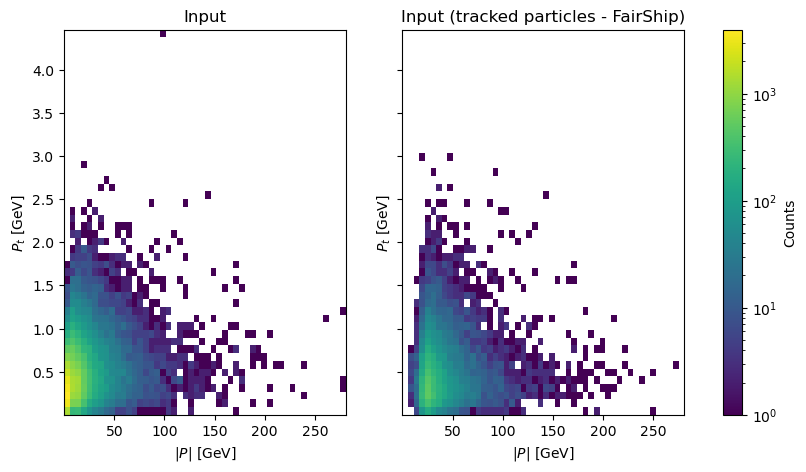

In [8]:
fig,axes = plt.subplots(1,2,figsize=(10, 5), sharey = True,sharex=True)
h1, xedges, yedges, im1 = axes[0].hist2d(P_input, pt_input, bins=50, cmap='viridis', norm=LogNorm())
axes[0].set_xlabel('$|P|$ [GeV]')
axes[0].set_ylabel('$P_t$ [GeV]')
axes[0].set_title('Input')

axes[1].hist2d(p_fs_start, pt_fs_start, bins=[xedges, yedges], cmap=im1.cmap, norm=im1.norm)
axes[1].set_xlabel('$|P|$ [GeV]')
axes[1].set_ylabel('$P_t$ [GeV]')
axes[1].set_title('Input (tracked particles - FairShip)')


fig.colorbar(im1, ax=axes,label='Counts')
plt.show()

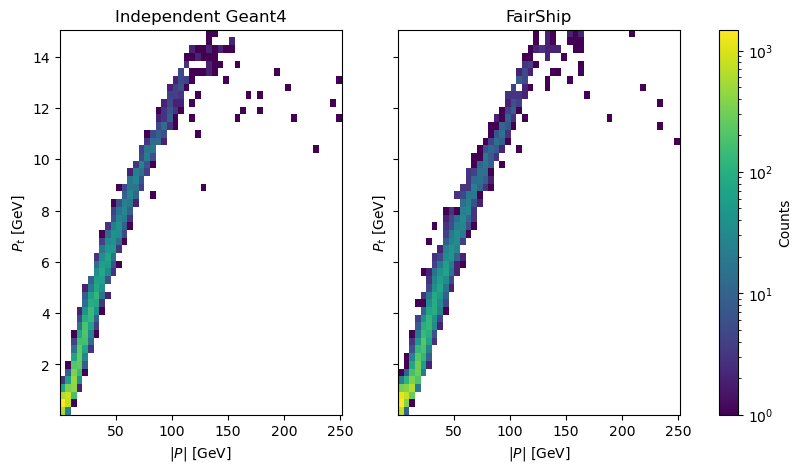

In [9]:
fig,axes = plt.subplots(1,2,figsize=(10, 5), sharey = True,sharex=True)
h1, xedges, yedges, im1 = axes[0].hist2d(P, pt, bins=50, cmap='viridis', norm=LogNorm())
axes[0].set_xlabel('$|P|$ [GeV]')
axes[0].set_ylabel('$P_t$ [GeV]')
axes[0].set_title('Independent Geant4')

axes[1].hist2d(p_fs, pt_fs, bins=[xedges, yedges], cmap='viridis', norm=LogNorm())
axes[1].set_xlabel('$|P|$ [GeV]')
axes[1].set_ylabel('$P_t$ [GeV]')
axes[1].set_title('FairShip')


fig.colorbar(im1, ax=axes,label='Counts')
plt.show()